##### Load libs:

In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

##### 1.Create connect:

In [2]:
connect = sqlite3.connect('../data/db_prev_day.sqlite')

##### 2.Load data:

In [3]:
data_views = pd.read_sql(
	"SELECT "
		"t.uid, "
		"AVG((CAST(strftime('%s', first_commit_ts) AS INT) - deadlines) / 3600) as avg_diff, " \
		"COUNT(*) as pageviews " \
	"FROM test t LEFT JOIN deadlines d ON d.labs = t.labname " \
	"LEFT JOIN pageviews ON t.uid = pageviews.uid " \
	"WHERE t.labname != 'project1' " \
	"GROUP BY t.uid",
	connect
)
data_views

,uid,avg_diff,pageviews
0,user_1,-64.400000,140
1,user_10,-74.800000,445
2,user_14,-159.000000,429
3,user_17,-61.600000,235
4,user_18,-5.666667,9
5,user_19,-98.750000,64
6,user_21,-95.500000,40
7,user_25,-92.600000,895
8,user_28,-86.400000,745
9,user_3,-105.400000,1585


In [4]:
data_commits = pd.read_sql(
	"SELECT "
		"uid, COUNT(*) as num_commits " \
	"FROM checker c " \
	"WHERE c.labname != 'project1' " \
	"GROUP BY uid",
	connect
)

data_commits

,uid,num_commits
0,None,4
1,admin_1,7
2,admin_2,1
3,user_0,3
4,user_1,62
5,user_10,20
6,user_11,7
7,user_12,86
8,user_13,52
9,user_14,61


In [5]:
data = data_views.merge(data_commits, how = 'left', on = 'uid')
data

,uid,avg_diff,pageviews,num_commits
0,user_1,-64.400000,140,62
1,user_10,-74.800000,445,20
2,user_14,-159.000000,429,61
3,user_17,-61.600000,235,51
4,user_18,-5.666667,9,5
5,user_19,-98.750000,64,118
6,user_21,-95.500000,40,65
7,user_25,-92.600000,895,79
8,user_28,-86.400000,745,60
9,user_3,-105.400000,1585,18


In [6]:
data.corr(numeric_only=True)

,avg_diff,pageviews,num_commits
avg_diff,1.000000,-0.185834,-0.304931
pageviews,-0.185834,1.000000,-0.186776
num_commits,-0.304931,-0.186776,1.000000


##### 3.Plot:

In [8]:
data.count()

uid            11
avg_diff       11
pageviews      11
num_commits    11
dtype: int64

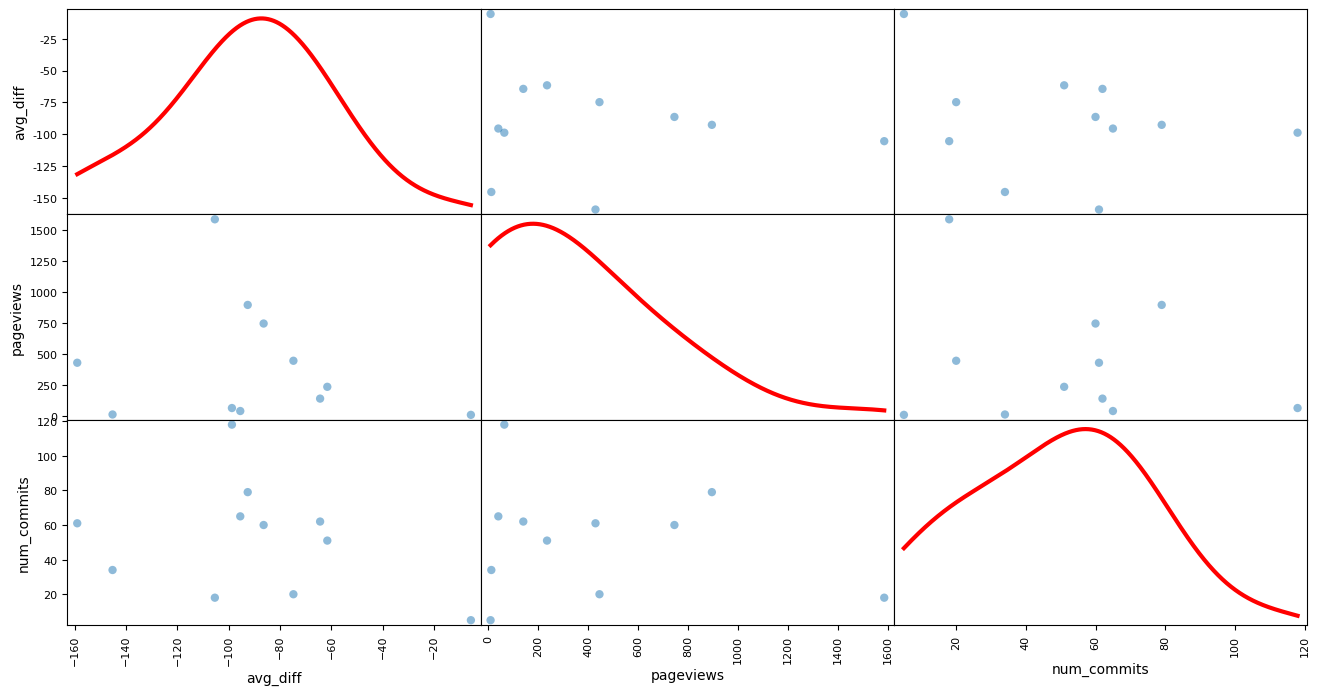

In [7]:
axes = scatter_matrix(data,diagonal='kde',figsize=(16,8),marker=200)
for ax in axes.ravel():
    for line in ax.lines:
        line.set_linewidth(3)
        line.set_color('red')

##### 4.Questions:

Можно ли сказать, что если у пользователя мало просмотров страниц, то, вероятно, у него мало и коммитов?<br>Ответ: Нет

Можно ли сказать, что если у пользователя мало просмотров страниц, то, скорее всего, средняя разница между первым коммитом и крайним сроком выполнения лабораторной работы будет небольшой?<br>Ответ: Нет

Можно ли сказать, что есть много пользователей с малым количеством коммитов и несколько с большим количеством коммитов?<br>Ответ: Да

Можно ли сказать, что есть много пользователей с небольшой средней разницей и несколько пользователей с большой средней разницей?<br>Ответ: Нет

##### 5.Close connect:

In [9]:
connect.close()